In [1]:
from typing import Callable,List
from scipy.misc import derivative
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def func_test(x: float) -> float:
    return x**2 -0.2*x**3 - 4

In [3]:
def Plot_Func(a: float, b: float, func: Callable[[float], float]) -> None:
    """
    Функция графика функции
    :param float a: Левая граница отрезка 
    :param float b: Правая граница отрезка
    :param List[float] x_points: Точки по оси абсцисс
    :param List[float] value_points: Точки по оси ординат
    :param int min_index: Значение экстремума функции
    :return Figure size 640x480 with 1 Axes, AxesSubplot fig, ax:
    """       
    step = (b-a)/100
    x_points = np.arange(a+step, b, step)
    value_points = np.array([func(x) for x in x_points])
    fig, ax = plt.subplots()
    ax.set_xlim(a,b)
    ax.set_ylim(-5,2)
    ax.plot(x_points, value_points, linewidth=2.0)
    return fig, ax

In [4]:
# Параметры 
a = -2
b = 5
N = 10
tol = 10**(-2)

# Методы нулевого порядка

## Первый метод 
## Оптимальный пассивный поиск

In [5]:
def Plot_Func_Passive_Search(a: float, b: float, x_points: List[float], value_points: List[float], min_index: int,  func: Callable[[float], float]) -> None:
    """
    Функция построение точек решения функции
    :param float a: Левая граница отрезка 
    :param float b: Правая граница отрезка
    :param List[float] x_points: Точки по оси абсцисс
    :param List[float] value_points: Точки по оси ординат
    :param int min_index: Значение экстремума функции
    :return 
    """
    n=1
    for i in x_points:
        print (f"{n} Итерация")
        n+=1
        fig, ax  = Plot_Func(a=a, b=b, func=func)
        ax.scatter(i, func(i), linewidth=2.0, color= "green")
        plt.grid()
        plt.show()
    print ("Точка минимума")
    fig, ax  = Plot_Func(a=a, b=b, func=func)
    ax.scatter(x_points[min_index], value_points[min_index], linewidth=2.0, color = 'red')
    plt.grid()
    plt.show()

In [6]:
def Passive_Search_Method(a: float, b: float, N: int, func: Callable[[float], float]) -> float:
    """
    Функция нахождения экстремума функции методом оптимального пассивного поиска
    :param float a: Левая граница отрезка 
    :param float b: Правая граница отрезка
    :param int N: Количество опрределяющих точек --фактор влиящий на точность решения 
    :param Callable[[float], float] func: Заданная функция
    :return float: Значение экстремума функции
    """
    step = (b-a)/N
    
    x_points = np.arange(a+step, b, step)

    value_points = np.array([func(x) for x in x_points])

    min_index = value_points.argmin()

    Plot_Func_Passive_Search(a, b, x_points, value_points, min_index, func)
               
    return x_points[min_index]

1 Итерация


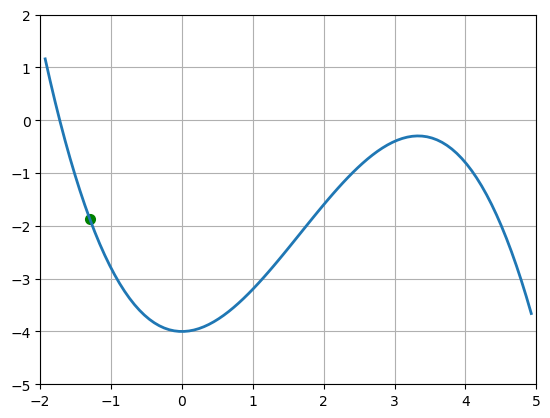

2 Итерация


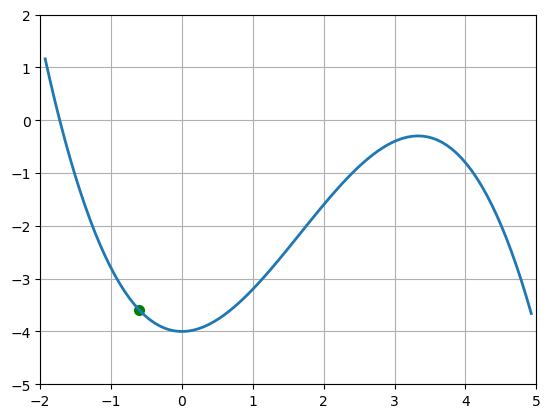

3 Итерация


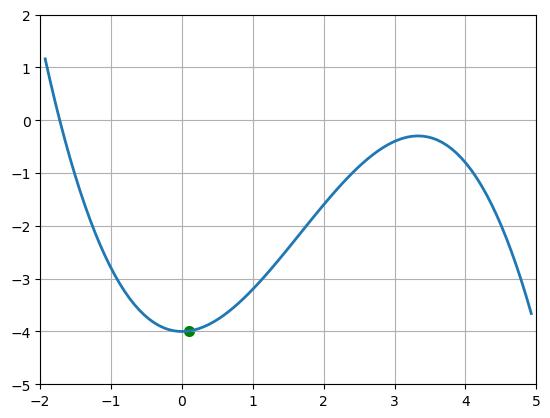

4 Итерация


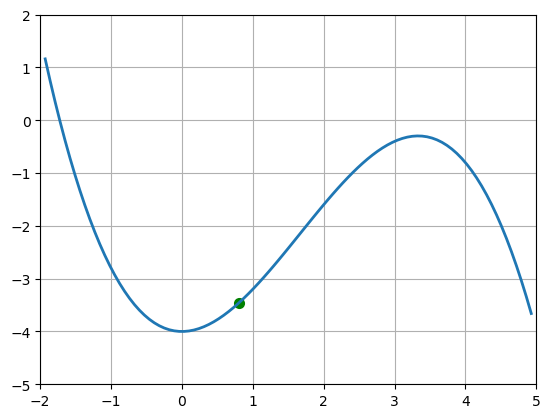

5 Итерация


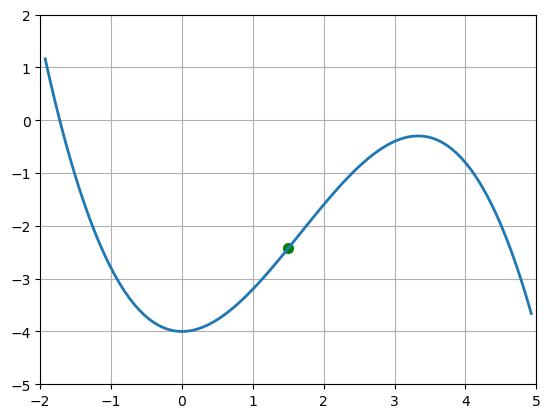

6 Итерация


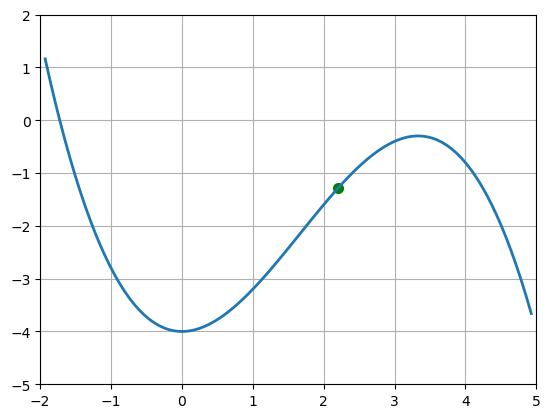

7 Итерация


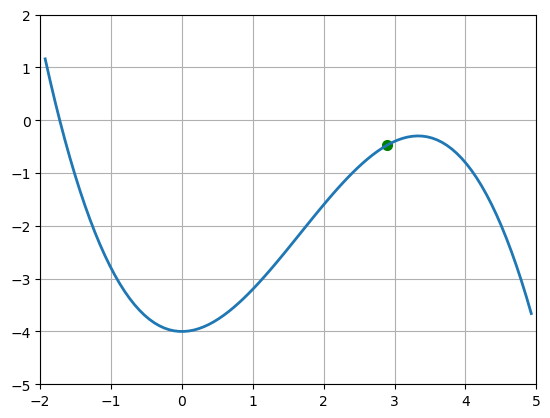

8 Итерация


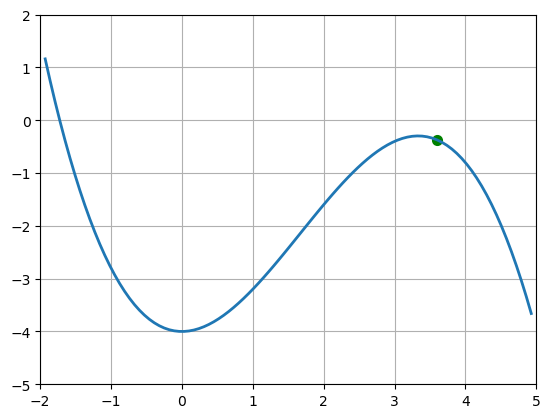

9 Итерация


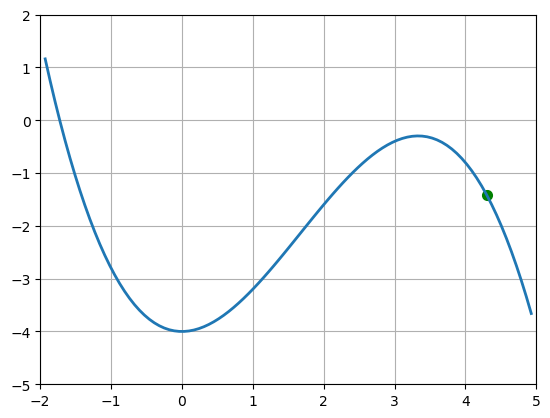

Точка минимума


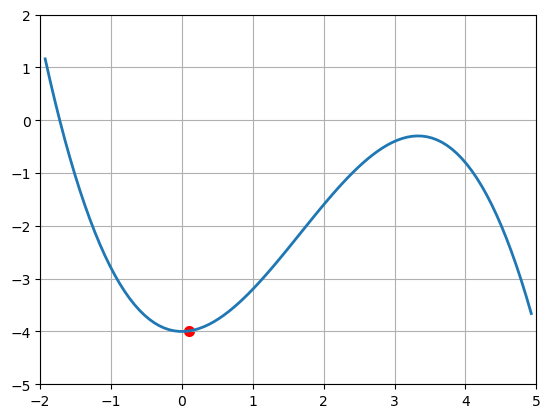

0.09999999999999987

In [7]:
Passive_Search_Method(a=a,b=b,N=N,func=func_test)

## Второй метод
## Деление отрезка пополам

In [8]:
def Нalf_Method(a: float, b: float, tol: float, d: float,func: Callable[[float], float]) -> float:
    """
    Функция нахождения экстремума функции методом деления отрезка пополам
    :param float a: Левая граница отрезка 
    :param float b: Правая граница отрезка
    :param float tol: Заданная точность решения 
    :param float d: Параметр метода
    :param Callable[[float], float] func: Заданная функция
    :return float: Значение экстремума функции
    """
    a1 = a
    b1 = b
    i = 0
    while(True):
        i += 1
        x1 = (a+b)/2 - d
        x2 = (a+b)/2 + d
        fig, ax = Plot_Func(a=a1, b=b1, func=func)
        plt.grid()
        if (func(x1) <= func(x2)):
            b = x2
        else:
            a = x1
        if ((b-a)/2 < tol):
            break
        ax.scatter((a+b)/2, func((a+b)/2), linewidth=2.0,color = 'Green')    
        print (f"{i} Итерация")
        plt.show()
    print (f"{i} Итерация")
    print ("Расчет окончен")
    ax.scatter((a+b)/2, func((a+b)/2), linewidth=2.0,color = 'red')
    plt.show()
    return (a+b)/2
        
    

1 Итерация


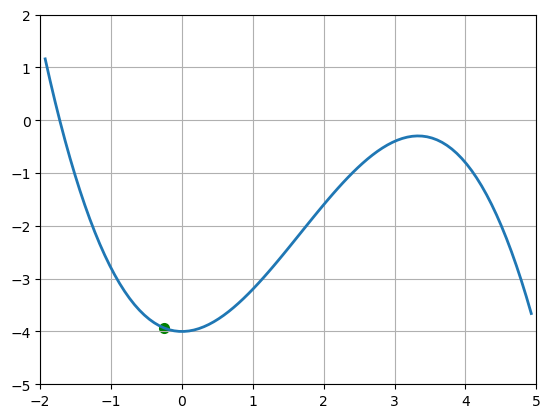

2 Итерация


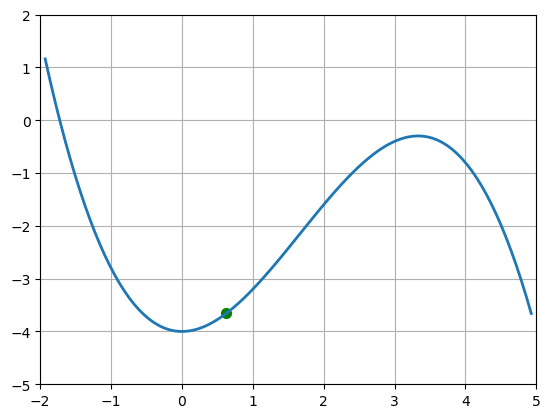

3 Итерация


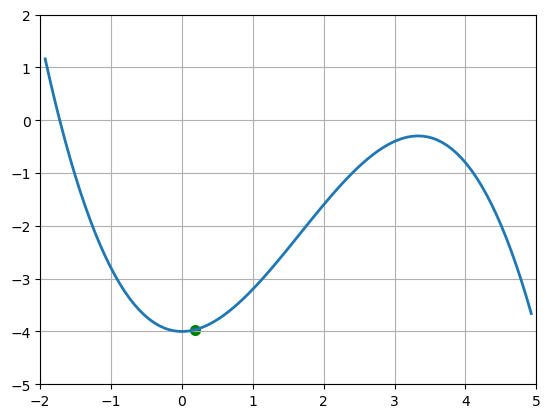

4 Итерация


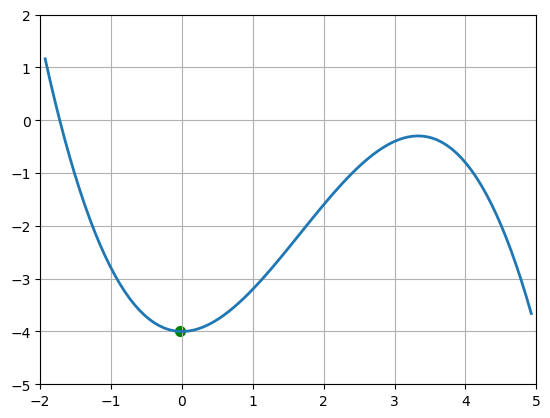

5 Итерация


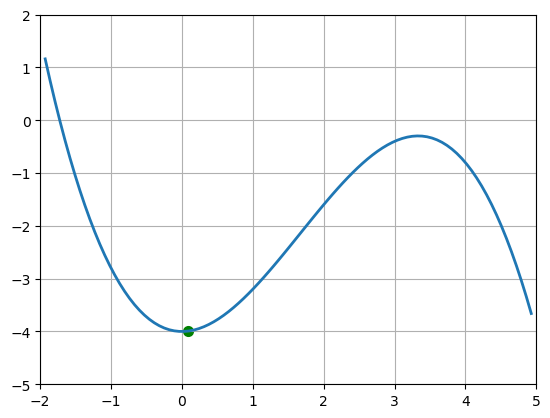

6 Итерация


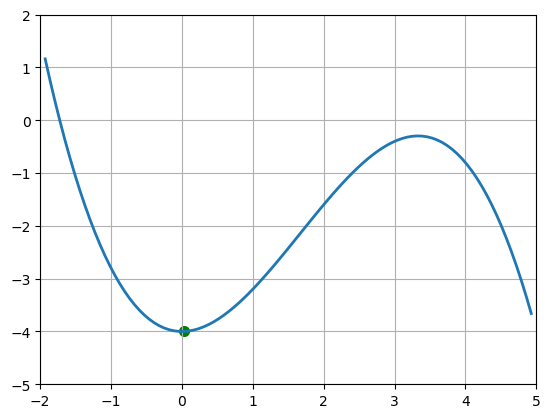

7 Итерация


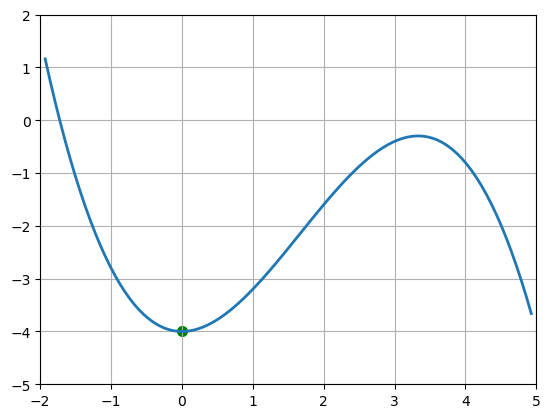

8 Итерация


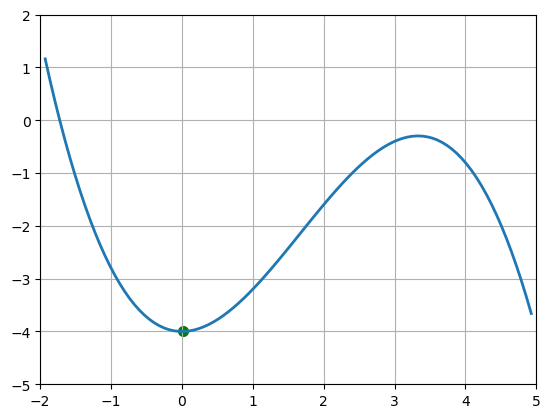

9 Итерация
Расчет окончен


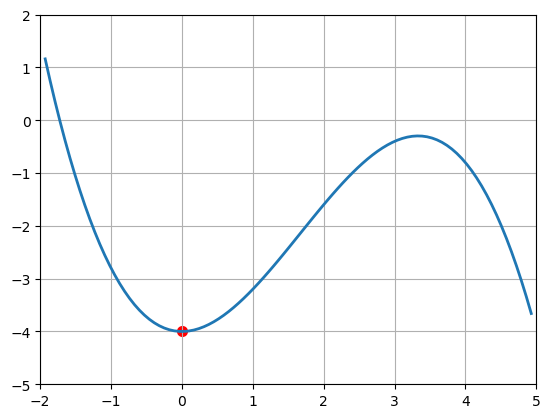

0.0033574218749999212

In [9]:
Нalf_Method(a=a, b=b, tol=tol, d=10**(-3), func=func_test)

## Третий метод
## Метод Фибоначчи

In [10]:
def FibonacciNum(num:int ) -> int:
    """
    Функция расчета числа фибонатччи
    :param int num: Индекс числа фибонатччи
    :return int: Значение экстремума функции
    """
    arr = [1,1,2]
    if num < len(arr):
        return arr[num]
    else:
        for i in range(len(arr)-1, num):
            new_fib = arr[i-1] + arr[i]
            arr.append(new_fib)
        return arr[num]

In [11]:
def Fibonacci_Method(a: float, b: float, N: int, func: Callable[[float], float]) -> float: 
    """
    Функция нахождения экстремума функции методом деления отрезка пополам
    :param float a: Левая граница отрезка 
    :param float b: Правая граница отрезка
    :param int N: Количество опрределяющих точек - фактор влиящий на точность решения
    :param Callable[[float], float] func: Заданная функция
    :return float: Значение экстремума функции
    """
    a1=a
    b1=b
    x1 = a + FibonacciNum(N - 2) / FibonacciNum(N) * (b - a)
    x2 = a + FibonacciNum(N - 1) / FibonacciNum(N) * (b - a)
    i=0
    for k in range(2, N - 2):
        i+=1
        fig, ax =  Plot_Func(a=a1, b=b1, func=func)
        plt.grid()
        print (f"{i} Итерация")
        if func(x1) <= func(x2):
            b = x2
            x2 = x1
            x1 = a + FibonacciNum(N - k - 3) / FibonacciNum(N - k - 1) * (b - a)
        else:
            a = x1
            x1 = x2
            x2 = a + FibonacciNum(N - k - 2) / FibonacciNum(N - k - 1) * (b - a)
        ax.scatter((a + b) / 2, func((a + b) / 2), linewidth=2.0,color = 'Green')
        plt.show()
    if func(x1) <= func(x2):
        b = x2
    else:
        a = x1
    fig, ax =  Plot_Func(a=a1, b=b1, func=func)
    plt.grid()
    print (f"{i} Итерация")
    print ("Расчет окончен")
    ax.scatter((a + b) / 2, func((a + b) / 2), linewidth=2.0,color = 'red')
    plt.show()
    return (a + b) / 2

1 Итерация


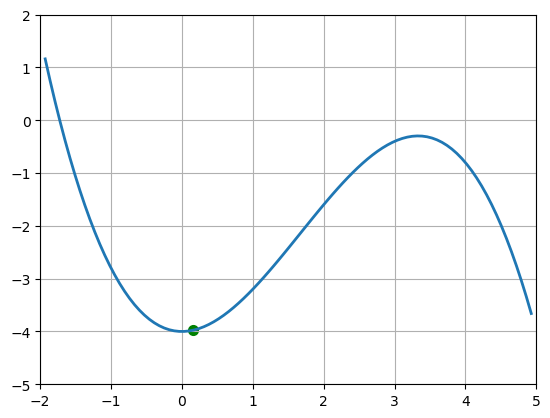

2 Итерация


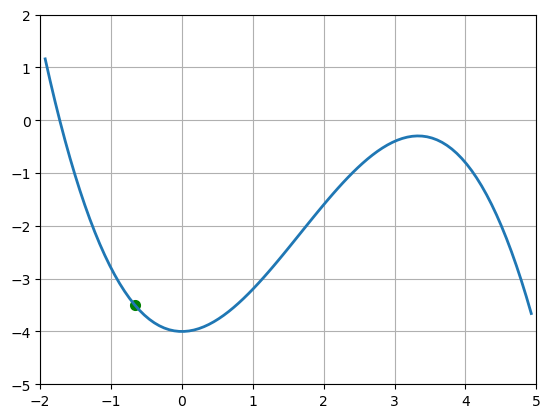

3 Итерация


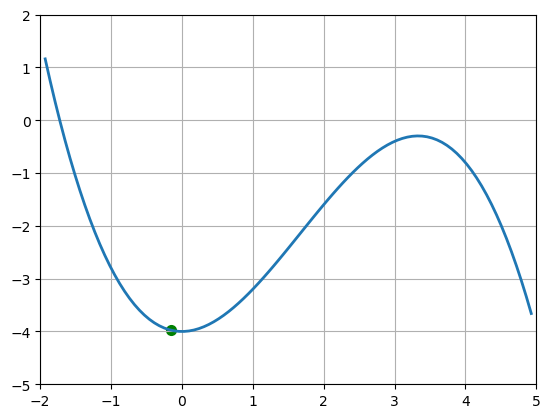

4 Итерация


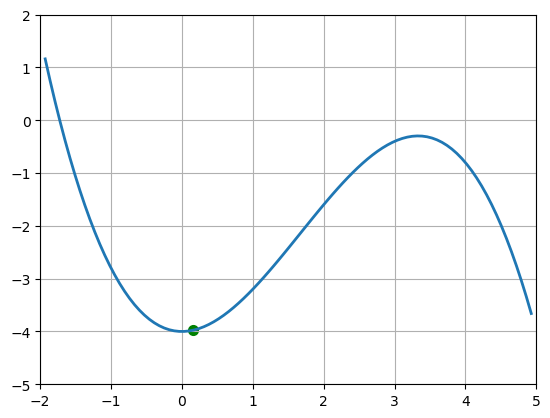

5 Итерация


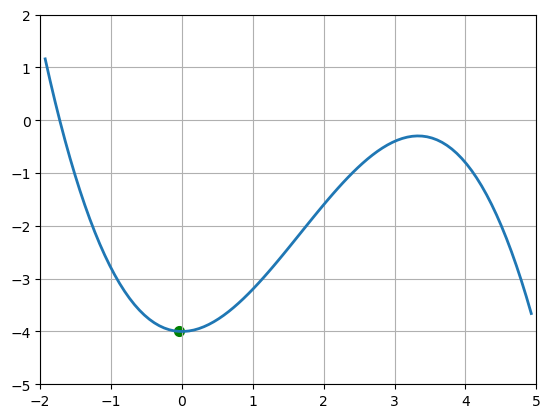

6 Итерация


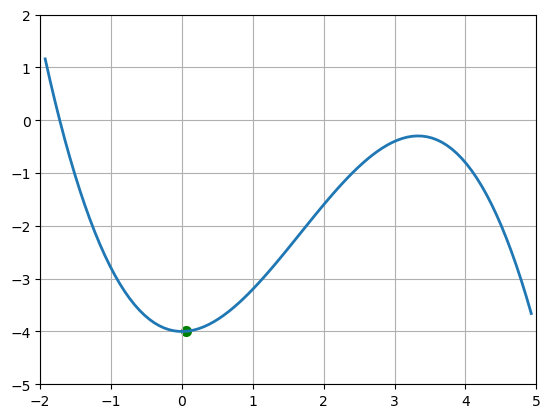

6 Итерация
Расчет окончен


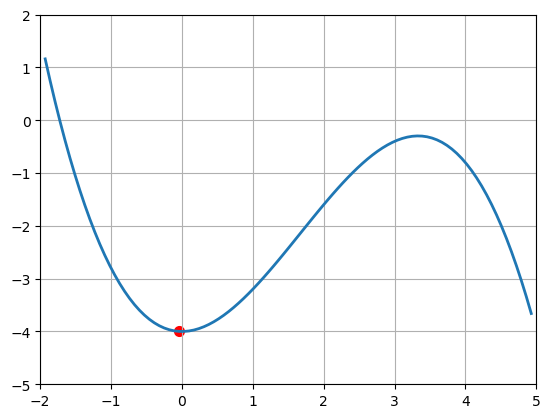

-0.04419475655430745

In [12]:
Fibonacci_Method(a=a, b=b, N=N, func=func_test)

## Четвертый метод
## Метод золотого сечения

In [13]:
def Golden_Section_Method(a: float, b: float, tol: float, func: Callable[[float], float]) -> float:
    """
    Функция нахождения экстремума функции методом золотого сечения 
    :param float a: Левая граница отрезка 
    :param float b: Правая граница отрезка
    :param float tol: Необходимая точность решения
    :param Callable[[float], float] func: Заданная функция
    :return float: Значение экстремума функции
    """
    a1=a
    b1=b
    i=0
    while True:
        i+=1
        x1 = b - (b-a) / 1.618
        x2 = a + (b-a) / 1.618
        y1 = func(x1)
        y2 = func(x2)
        fig, ax =  Plot_Func(a=a1, b=b1, func=func)
        plt.grid()
        ax.scatter((a + b) / 2, func((a + b) / 2), linewidth=2.0,color = 'Green')
        
        print (f"{i} Итерация")
        if y1 >= y2:
            a = x1
        else:
            b = x2
        if abs(b-a) < tol:
            ax.scatter((a + b) / 2, func((a + b) / 2), linewidth=2.0,color = 'red')
            print ("Расчет окончен")
            plt.show()
            break
        plt.show()    
    return (a+b) / 2

1 Итерация


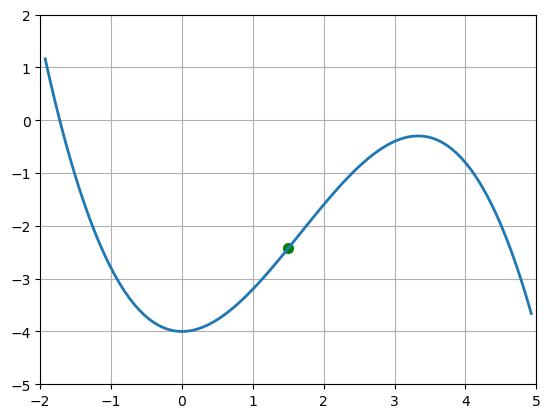

2 Итерация


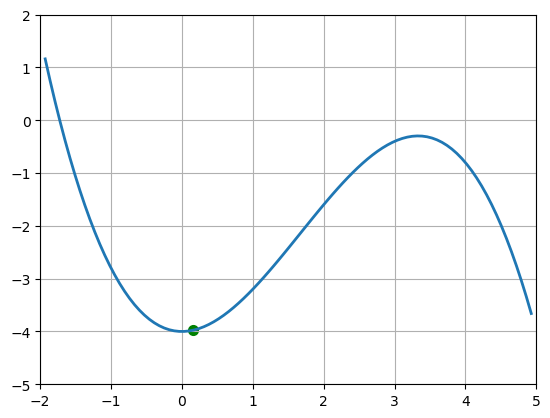

3 Итерация


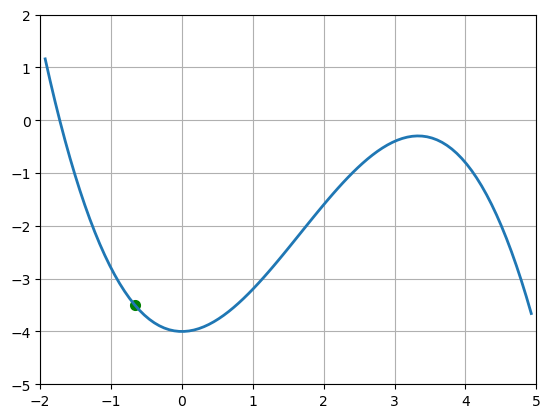

4 Итерация


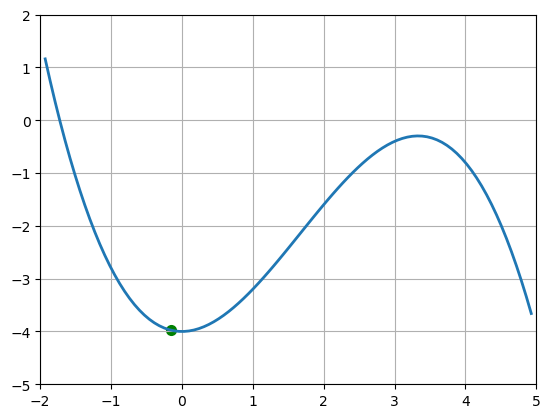

5 Итерация


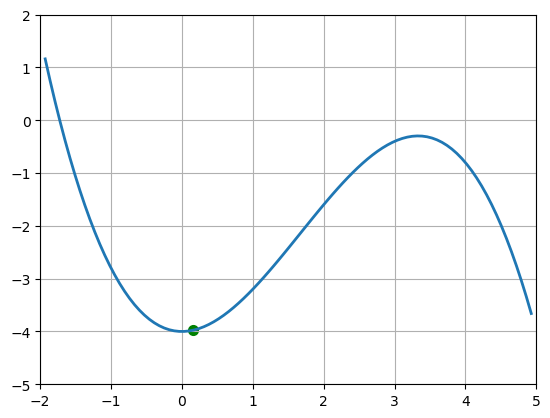

6 Итерация


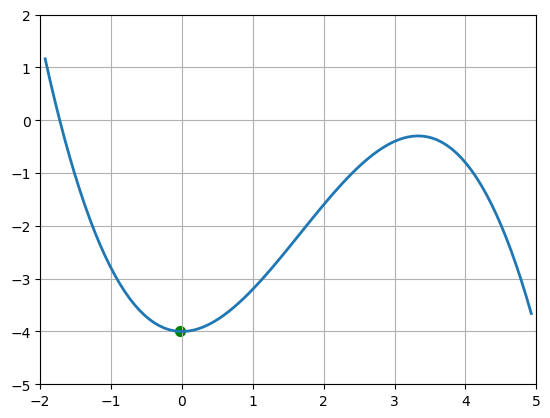

7 Итерация


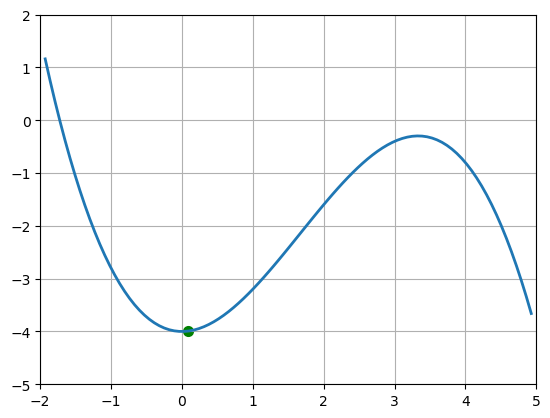

8 Итерация


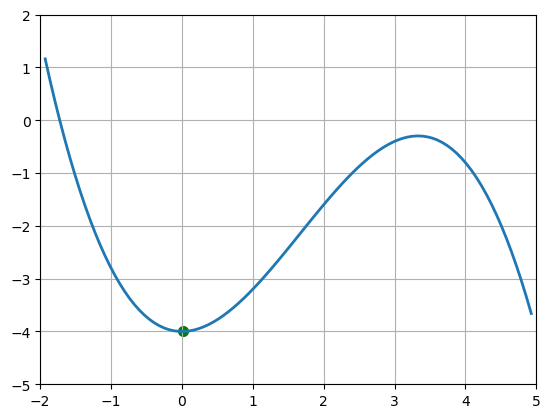

9 Итерация


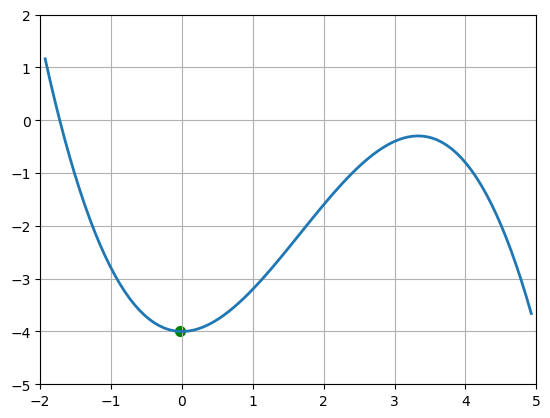

10 Итерация


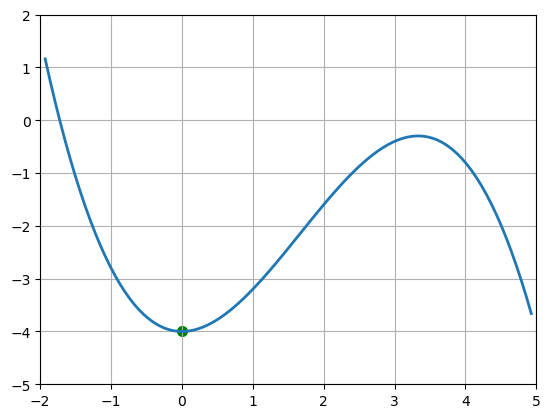

11 Итерация


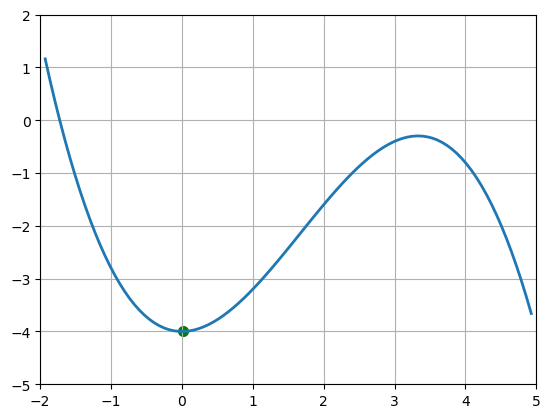

12 Итерация


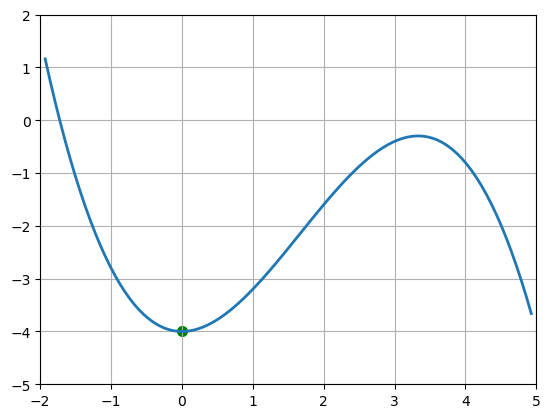

13 Итерация


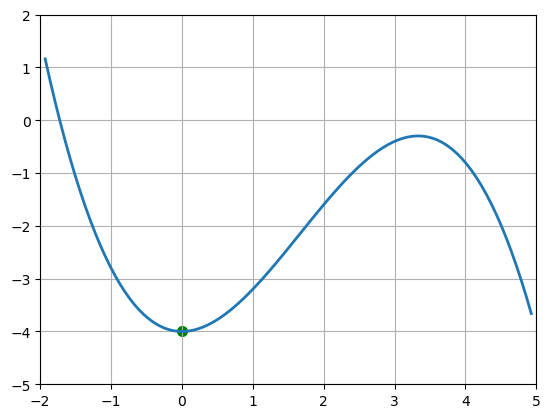

14 Итерация
Расчет окончен


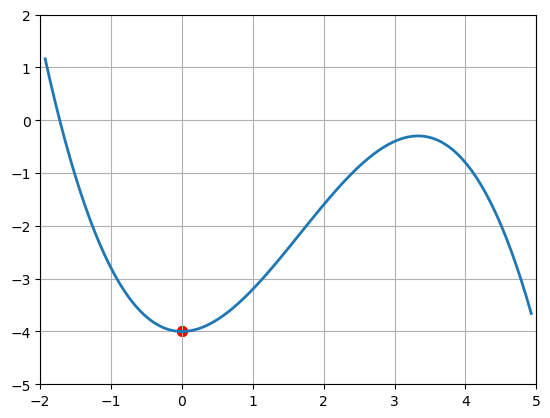

-0.0018265622914694227

In [14]:
Golden_Section_Method(a=a, b=b, tol=tol, func=func_test)

# Методы первого порядка
#### Для получения производной использовалась функция из библиотеки SciPy -> derivative

## Первый метод 
## Метод средней точки 

In [15]:
def Midpoint_Method(a: float, b: float, tol: float, func: Callable[[float], float]) -> float:
    """
    Функция нахождения экстремума функции методом средней точки 
    :param float a: Левая граница отрезка 
    :param float b: Правая граница отрезка
    :param float tol: Необходимая точность решения
    :param Callable[[float], float] func: Заданная функция
    :return float: Значение экстремума функции
    """
    x = (a + b) / 2.0
    a1=a
    b1=b
    i=0
    while(True):
        i += 1
        fig, ax =  Plot_Func(a=a1, b=b1, func=func)
        plt.grid()
        if(derivative(func,x,dx=1e-6) > 0):
            b = x;
        else:
            a = x;
        x = (a + b) / 2.0
        if (abs(derivative(func,x,dx=1e-6) ) < tol):
            print (f"{i} Итерация")
            print ("Расчет окончен")
            ax.scatter(x, func(x), linewidth=2.0,color = 'red')
            plt.show()
            break
        ax.scatter(x, func(x), linewidth=2.0,color = 'Green')
        print (f"{i} Итерация")
        plt.show() 
    return x    

1 Итерация


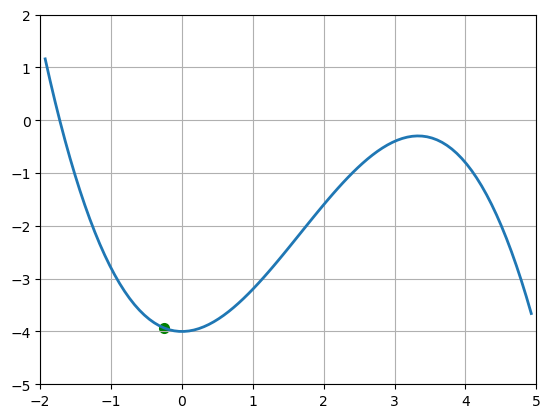

2 Итерация


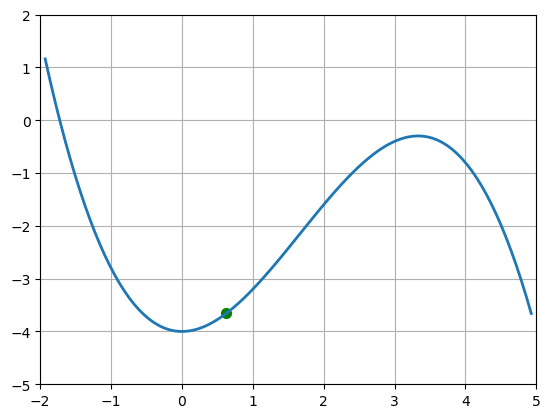

3 Итерация


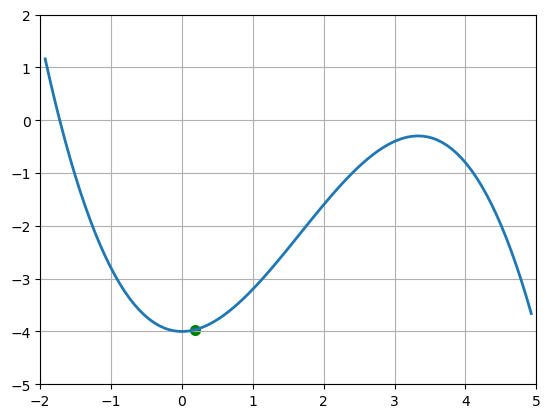

4 Итерация


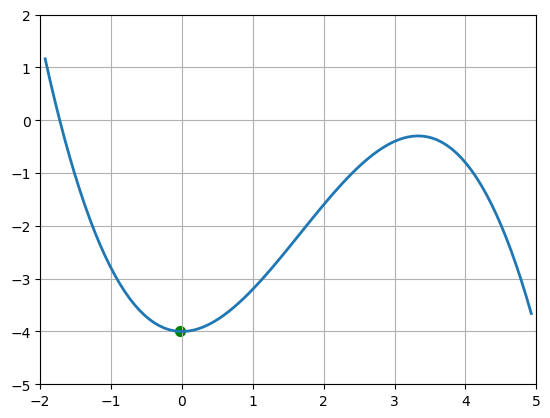

5 Итерация


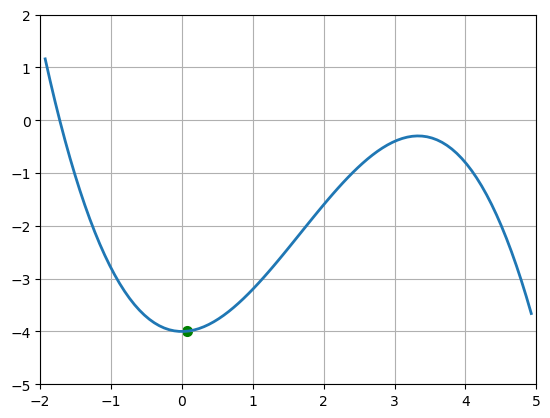

6 Итерация


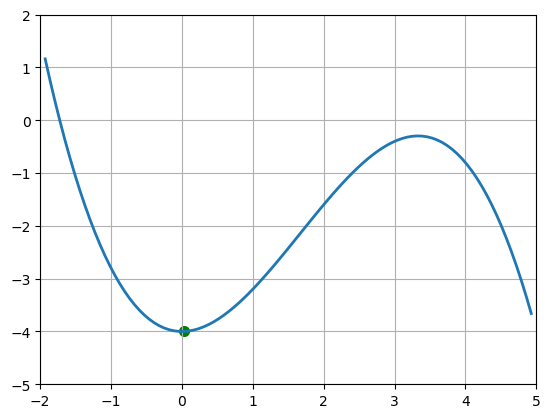

7 Итерация
Расчет окончен


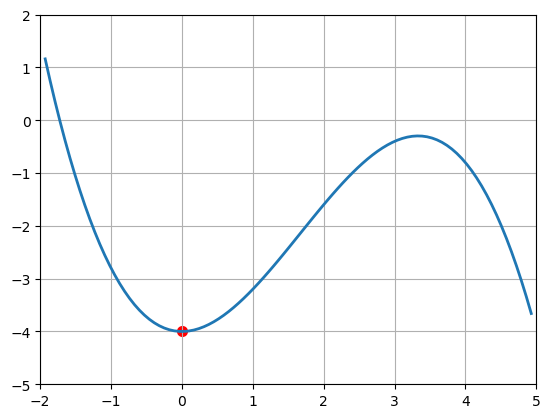

-0.00390625

In [16]:
Midpoint_Method(a=a, b=b, tol=tol, func=func_test)

## Второй метод 
## Метод Ньютона

In [25]:
def Newton_Method(a: float, b: float, tol: float, func: Callable[[float], float]) -> float:
    """
    Функция нахождения экстремума функции методом Ньютона
    :param float a: Левая граница отрезка 
    :param float b: Правая граница отрезка
    :param float tol: Необходимая точность решения
    :param Callable[[float], float] func: Заданная функция
    :return float: Значение экстремума функции
    """
    x = (a + b) / 2
    a1=a
    b1=b
    i=0
    while(True):
        i += 1
        fig, ax =  Plot_Func(a=a1, b=b1, func=func)
        plt.grid()
        x = x - (derivative(func, x, dx=1e-6) / derivative(func, x, dx=1e-6, n=2))
        ax.scatter(x, func(x), linewidth=2.0,color = 'green')
        if (abs(derivative(func,x,dx=1e-6) ) < tol):
            print (f"{i} Итерация")
            print ("Расчет окончен")
            ax.scatter(x, func(x), linewidth=1.0,color = 'red')
            plt.show()
            break
        print (f"{i} Итерация")
        plt.show() 
    return x

1 Итерация


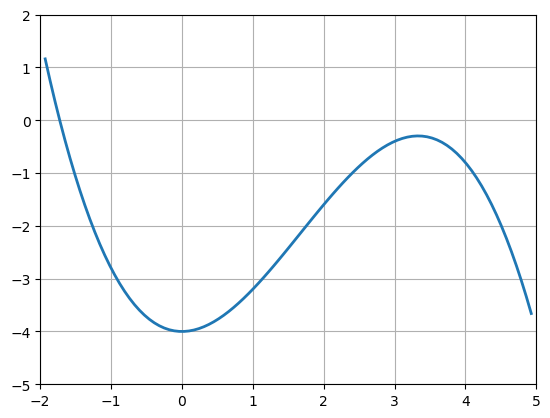

2 Итерация


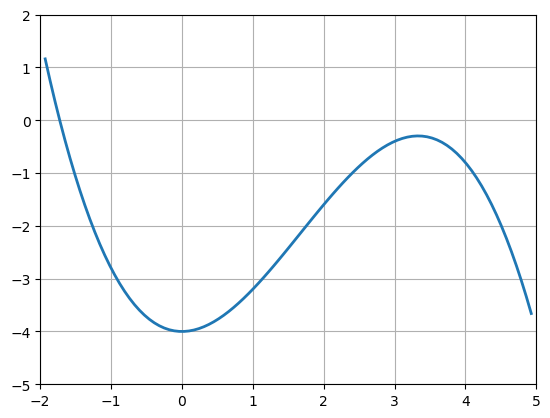

3 Итерация


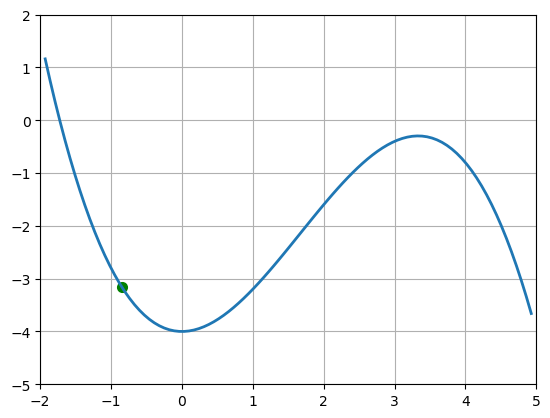

4 Итерация


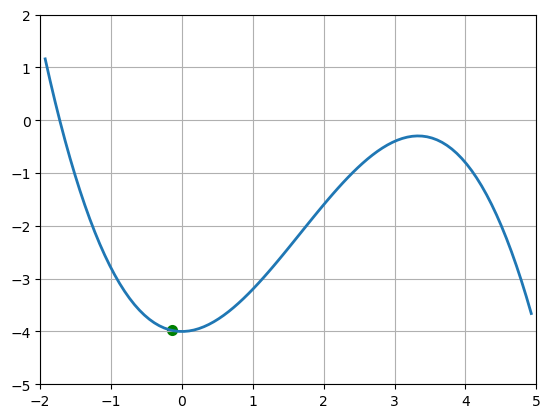

5 Итерация


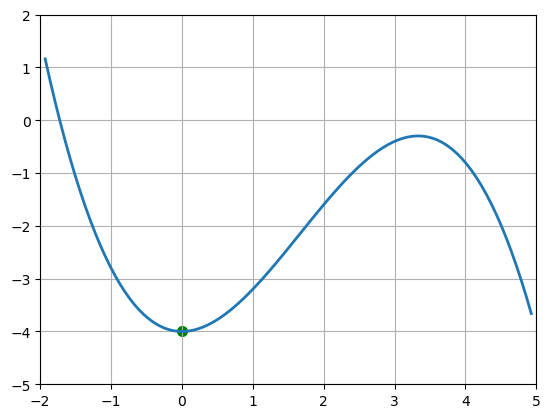

6 Итерация
Расчет окончен


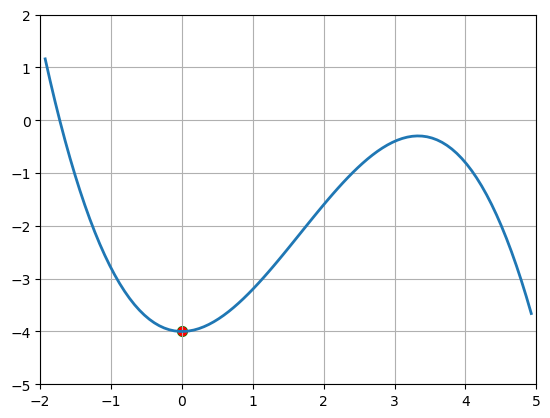

-1.0943443805347744e-05

In [26]:
Newton_Method(a=a, b=b, tol=tol, func=func_test)

## Третий метод 
## Метод Секущей

In [19]:
def Secant_Method(a: float, b: float, tol: float, func: Callable[[float], float]) -> float:
    """
    Функция нахождения экстремума функции методом секущей 
    :param float a: Левая граница отрезка 
    :param float b: Правая граница отрезка
    :param float tol: Необходимая точность решения
    :param Callable[[float], float] func: Заданная функция
    :return float: Значение экстремума функции
    """
    x = a - derivative(func,a,dx=1e-6) / (derivative(func,a,dx=1e-6) - derivative(func,b,dx=1e-6)) * (a - b)
    a1=a
    b1=b
    i=0
    while(True):
        if (derivative(func,x,dx=1e-6) > 0):
                b = x
        else:
                a = x
        i += 1
        fig, ax =  Plot_Func(a=a1, b=b1, func=func)
        plt.grid()
        x = a - derivative(func,a,dx=1e-6) / (derivative(func,a,dx=1e-6) - derivative(func,b,dx=1e-6)) * (a - b)
        ax.scatter(x, func(x), linewidth=1.0,color = 'green')
        if (abs(derivative(func,x,dx=1e-6)) < tol) :
            print (f"{i} Итерация")
            print ("Расчет окончен")
            ax.scatter(x, func(x), linewidth=2.0,color = 'red')
            plt.show()
            break
        print (f"{i} Итерация")
        plt.show() 
    return x

1 Итерация


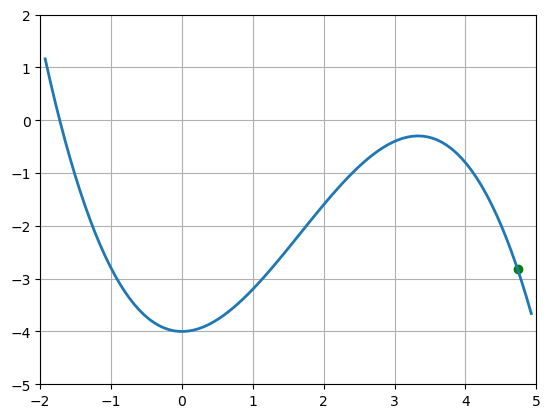

2 Итерация


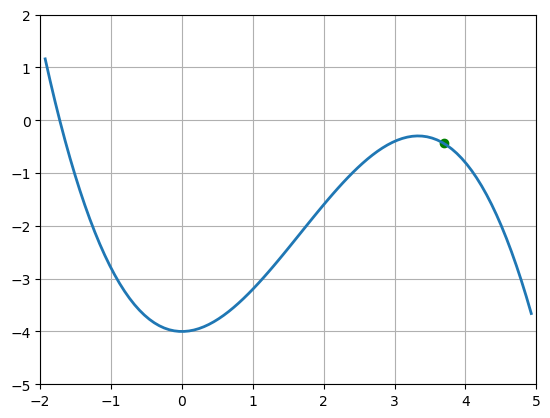

3 Итерация


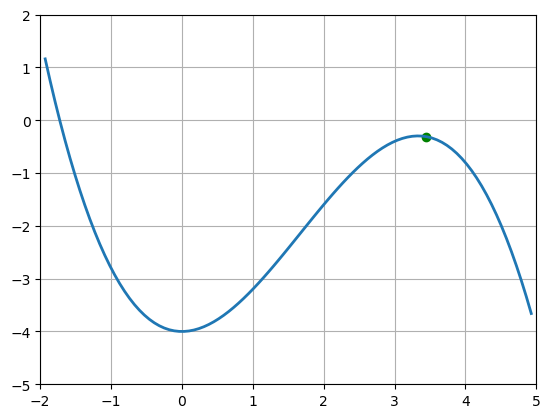

4 Итерация


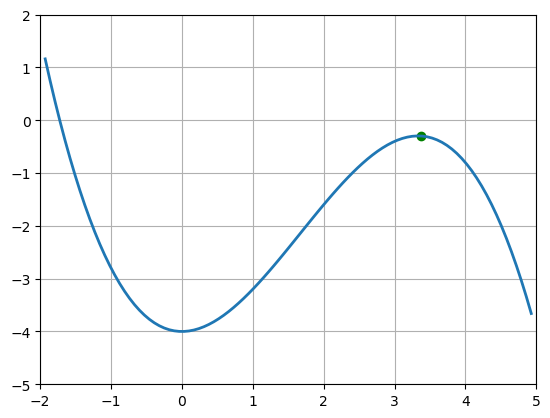

5 Итерация


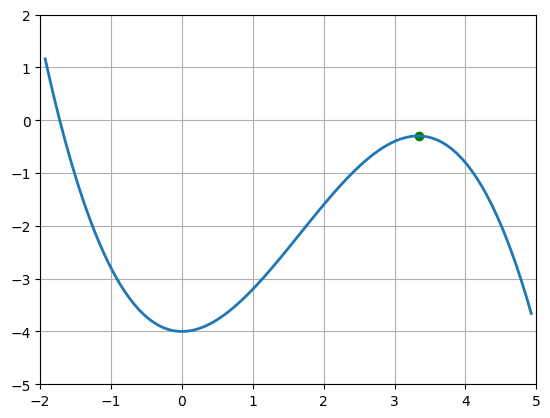

6 Итерация
Расчет окончен


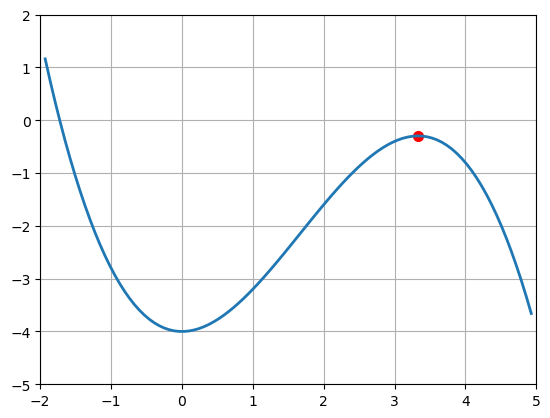

3.3374027165566083

In [20]:
Secant_Method(a=a, b=b, tol=tol, func=func_test)